* https://www.youtube.com/watch?v=5W715nfJNJw
* http://www.thinkbayes.com

In [21]:
from scipy import stats
import numpy as np
import pylab
import math
%matplotlib inline

In [2]:
# Common definitions

def normalize(n):
    return n / np.sum(n)

In [8]:
# Cookies

p_vanilla = [30./40, 20./40]
p_chocolate = [10./40, 20./40]

th = np.array([0.5, 0.5])
th = normalize(th * [30./40, 10./20]) # vanilla
th = normalize(th * [10./39, 10./19]) # chocolate
th = normalize(th * [29./38,  9./18]) # vanilla
print th

[ 0.52727273  0.47272727]


In [9]:
# Dice

th = np.array([1./5, 1./5, 1./5, 1./5, 1./5])
th = normalize(th * [0,    1./6, 1./8, 1./12, 1./20]) # 6
th = normalize(th * [0,    0,    1./8, 1./12, 1./20]) # 8
th = normalize(th * [0,    0,    1./8, 1./12, 1./20]) # 7
th = normalize(th * [0,    0,    1./8, 1./12, 1./20]) # 7
th = normalize(th * [0,    1./6, 1./8, 1./12, 1./20]) # 5
th = normalize(th * [1./4, 1./6, 1./8, 1./12, 1./20]) # 4
# th = normalize(th * [0,    0,    0,    0,     1./20]) # 15
print th

[ 0.          0.          0.91584527  0.08040343  0.0037513 ]


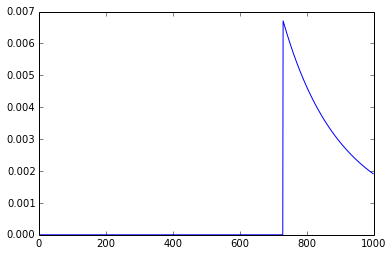

In [11]:
# Trains

def likelihood(n,i):
    if i < n:
        return 0
    else:
        return 1./i

def gen(n):
    ary = [0.]*1000
    for i in range(1000):
        ary[i] = likelihood(n,i)
    return ary

th = normalize(np.array([1.] * 1000))
th = normalize(th * gen(321)) # 321
th = normalize(th * gen(402))
th = normalize(th * gen(102))
th = normalize(th * gen(730))

pylab.plot(th)

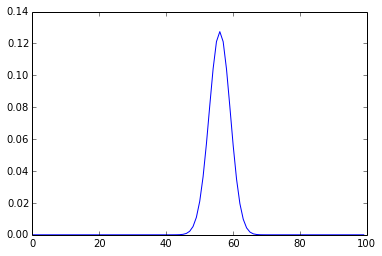

In [12]:
# Euro

def likelihood(n,i):
    p = i/100.
    if n == 'H':
        return p
    else:
        return 1-p

def gen(n):
    ary = [0.]*100
    for i in range(100):
        ary[i] = likelihood(n,i)
    return ary


th = normalize(np.array([1.] * 100))
for i in range(140):
    th = normalize(th * gen('H'))
for i in range(110):
    th = normalize(th * gen('T'))

pylab.plot(th)

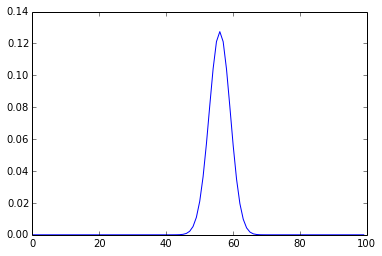

In [13]:
# Euro fairness

def likelihood(n,i):
    p = i/100.
    if n == 'H':
        return p
    else:
        return 1-p

def gen(n):
    ary = [0.]*100
    for i in range(100):
        ary[i] = likelihood(n,i)
    return ary


th = normalize(np.array([1.] * 100))
for i in range(140):
    th = normalize(th * gen('H'))
for i in range(110):
    th = normalize(th * gen('T'))

pylab.plot(th)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide


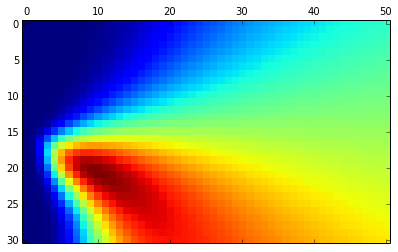

In [89]:
# Paintball http://www.greenteapress.com/thinkbayes/html/thinkbayes010.html#paintball

def likelihood(sx, sy, wx):
    locs = []
    for lx in range(31):
        theta = math.atan2(lx-sx, sy)
        speed = float(sy) / math.cos(theta)**2
        if speed == 0:
            locs.append(0)
        else:
            locs.append(1. / speed)
    locs = normalize(np.array(locs))
    return locs[wx]

def update(th, wx):
    for x in range(31):
        for y in range(51):
            th[x,y] *= likelihood(x,y,wx)
    return normalize(th)

th = normalize(np.matrix([[1.]*51]*31))
th = update(th, 15)
th = update(th, 16)
th = update(th, 18)
th = update(th, 21)
th = update(th, 3)
th = update(th, 30)
th = update(th, 25)

pylab.matshow(th)

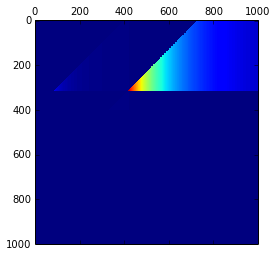

In [14]:
# Extended Trains

def likelihood(seenTrain,numberOfTrains,firstSerialNumber):
    if seenTrain < firstSerialNumber:
        return 0.00001
    if seenTrain >= firstSerialNumber + numberOfTrains:
        return 0.00001
    return 1./numberOfTrains

def update(th, n):
    for i in range(1000):
        for j in range(1000):
            th[i,j] *= likelihood(n,j,i)
    return normalize(th)

th = np.matrix([[1.] * 1000]*1000)
th = normalize(th)
th = update(th, 321)
th = update(th, 402)
# th = update(th, 102)
th = update(th, 730)

pylab.matshow(th)